# SVM (Support Vector Machines)

- 입력 데이터에서 단순한 초평면(hyperplane)으로 정의되지 않는 더 복잡한 모델을 만들 수 있도록 확장한 것 (복잡한 분류문제)

- 서포트 벡터 머신을 분류와 회귀에 모두 사용할 수 있음 <br>
(선형, 비선형 분류, 회귀, 이상치 탐색에도 사용되는 다목적 머신러닝 모델)

In [1]:
# !pip install mglearn

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

C:\Users\injoo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, 'feature 1')

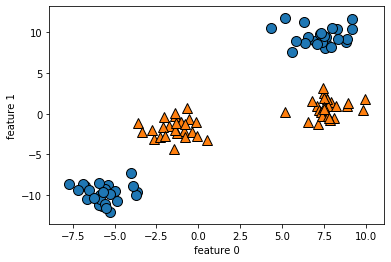

In [5]:
import mglearn
import matplotlib.pyplot as plt
from mglearn.datasets import make_blobs

# 선형적으로 구분되지 않는 클래스를 가진 이진 분류 세트
X, y = make_blobs(centers=4, random_state=8)

# 이진 분류 세트 시각화
y = y % 2   # 클래스 2개로 분리, 이진분류
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")



C:\Users\injoo\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'feature 1')

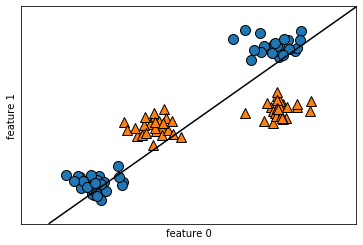

In [9]:
# 선형 분류
from sklearn.svm import LinearSVC

model = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(model, X)
mglearn.discrete_scatter(X[:, 0], X[:,1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

- 분류를 위한 선형 모델은 직선으로만 데이터 포인트를 나눌 수 있어서 이런 데이터셋에는 잘 들어 맞지 않음

선형 모델과 비선형 특징
    1. 직선과 초평면은 유연하지 못하여 저차원 데이터셋에서는 선형 모델이 매우 제한적
    2. 선형 모델을 유연하게 만드는 한 가지 방법은 특성끼리 곱하거나 특성을 거듭제곱하는 식으로 새로운 특성을 추가하는 것 

특성을 추가하여 확장 (2차원 -> 3차원)

- 특성1에서 유용한 세 번째 특성을 추가하여 확장한 데이터 세트
- 3차원 산점도로 표현

Text(0.5, 0, 'feature1 ** 2')

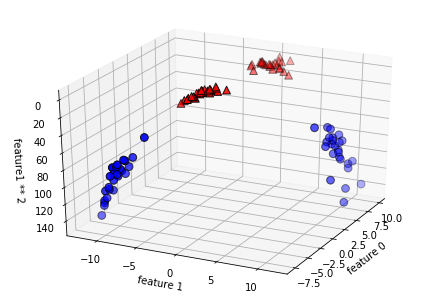

In [14]:
from mpl_toolkits.mplot3d import Axes3D, axes3d
import numpy as np

# 두 번째 특성을 제곱하여 추가
X_new = np.hstack([X, X[:,1:]**2])
figure = plt.figure()

# 3차원 그래프
ax = Axes3D(figure, elev=-152, azim=-26)

# y == 0인 포인트를 먼저 그리고 그 다음 y == 1인 포인트를 그림
mask = y ==0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2],
          c='b', cmap=mglearn.cm2, s=60, edgecolor='k')

# ~ 비트 NOT: x의 비트를 뒤집음 
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], 
           c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')
plt.xlabel("feature 0")
plt.ylabel("feature 1")
ax.set_zlabel("feature1 ** 2")

SVM을 이용하여 분류

- 선형 모델과 3차원 공간의 평면을 사용해 두 클래스를 구분
- 확장한 3차원 데이터 세트에서 선형 SVM이 만든 결정 경계

C:\Users\injoo\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, 'feature1 ** 2')

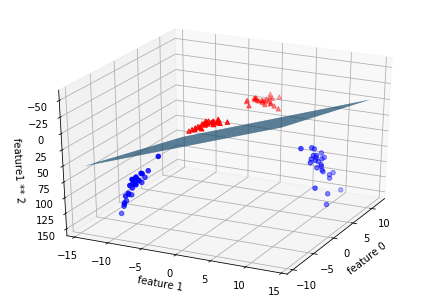

In [16]:
model = LinearSVC().fit(X_new, y)
coef, intercept = model.coef_.ravel(), model.intercept_

# 선형 결정 경계 그리기
# 3차원 그래프
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)

xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = -(coef[0] * XX + coef[1] * YY + intercept) / coef[2]

ax.plot_surface(XX, YY, ZZ)

# y == 0인 포인트를 먼저 그리고 그 다음 y == 1인 포인트를 그림
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^')

plt.xlabel("feature 0")
plt.ylabel("feature 1")
ax.set_zlabel("feature1 ** 2")

Text(0, 0.5, 'feature 1')

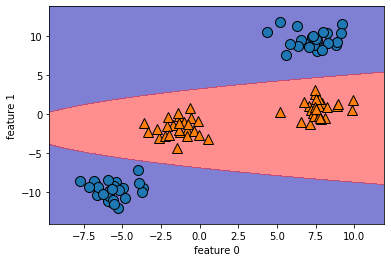

In [17]:
# 분류 결과 시각화
ZZ = YY ** 2
dec = model.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])

plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

- 원래 특성으로 투영해보면 이 선형 SVM 모델은 더 이상 선형이 아님
- 직선보다 타원에 가까운 모습을 확인

## 커널 기법 (Kernel trick)

- 데이터셋에 비선형 특성을 추가하여 선형 모델을 강력하게 만들 수 있음

- 하지만, 어떤 특성을 추가해야 할지 알 수 없고, 특성을 많이 추가하면 연산 비용이 커짐

- 커널 기법 : 새로운 특성을 만들지 않고 고차원 분류기를 학습시킬 수 있음 (데이터 포인트들의 거리를 계산 - 스칼라 곱)

- 고차원 공간 맵핑 방법 : 가우시안 커널, RBF (Radial Basis Function) 커널

- 주로 RBF 커널이 사용

## SVM

- Support Vector : 클래스 사이의 경계에 위치한 데이터 포인트

- 새로운 데이터 포인트에 대해 예측하려면 각 서포트 벡터와의 거리를 측정 -> SVC 객체의 dual_coef_ 속성에 저장

Text(0, 0.5, 'feature 1')

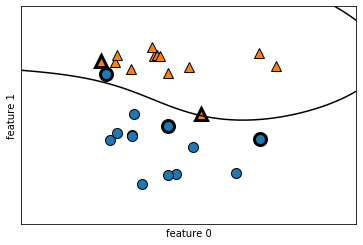

In [18]:
# RBF 커널을 이용한 SVM으로 만든 결정 경계와 서포트 벡터 시각화
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()

# 데이터 포인트 그리기
model = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)

mglearn.plots.plot_2d_separator(model, X)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

# 서포트 벡터
sv = model.support_vectors_


# dual_coef_의 부호에 의해 서포트 벡터의 클래스 레이블이 결정
sv_labels = model.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=12, markeredgewidth=3)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

- 선형이 아닌 부드러운 비선형 경계를 만들어냄
- C와 gamma 두 매개변수를 사용

#### SVM의 튜닝 (C, gamma)

- gamma 매개변수는 가우시안 커널 폭의 역수에 해당
 - gamma 매개변수가 하나의 훈련 샘플이 미치는 영향의 범위를 결정
 - 가우시안 커널의 반경이 클수록 훈련 샘플의 영향 범위도 커짐

- C 매개변수는 선형 모델에서 사용한 것과 비슷한 규제 매개변수
 - 각 포인트의 중요도(정확히는 dual_coef_ 값)를 제한

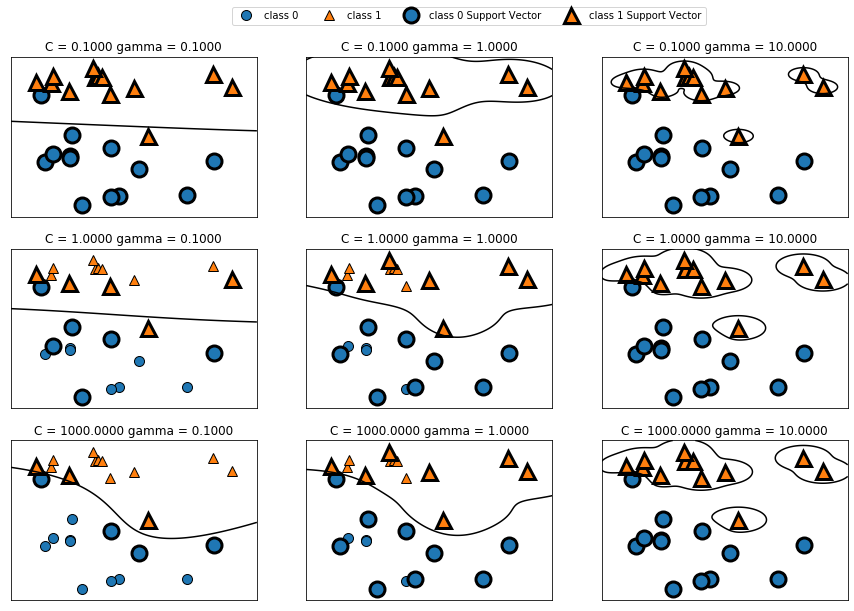

In [20]:
# C와 gamma 매개변수 설정에 따른 결정 경계와 서포트 벡터 시각화
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
  for a, gamma in zip(ax, range(-1, 2)):
    mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)


axes[0,0].legend(["class 0", "class 1", 
                  "class 0 Support Vector", 
                  "class 1 Support Vector"],
                 ncol=4, loc=(0.9, 1.2))

#### SVM 실습 01

유방암 데이터 셋에 SVM 적용

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# 데이터 로드
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    random_state=0)

# 모델 학습
model = SVC(gamma=0.01).fit(X_train, y_train)

# 평가
print("훈련 세트 정확도: {:.2f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(model.score(X_test, y_test)))

훈련 세트 정확도: 1.00
테스트 세트 정확도: 0.64


- 훈련 세트에는 완벽한 점수를 냈지만 테스트 세트에는 64% 정확도라서 이 모델은 상당히 과대적합

- SVM은 잘 작동하는 편이지만 매개변수 설정과 데이터 스케일에 매우 민감

- 특히 입력 특성의 범위가 비슷해야 하므로 각 특성의 최솟값과 최댓값을 로그 스케일로 변환

Text(0, 0.5, 'feature size')

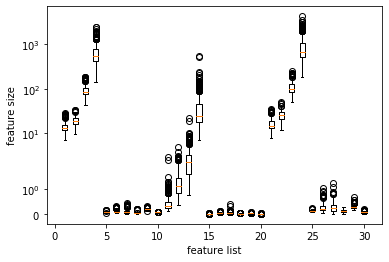

In [22]:
# 유방암 데이터 세트의 특성 값 범위 시각화 (y 축은 로그 스케일)
plt.boxplot(X_train, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("feature list")
plt.ylabel("feature size")

- 유방암 데이터셋의 특성은 자릿수 자체가 완전히 다름

- 일부 모델(선형 모델 등)에서도 어느 정도 문제가 될 수 있지만, 커널 SVM에서는 영향이 아주 큼

##### SVM을 위한 전처리

- 특성 값의 범위가 비슷해지도록 조정하는 것

In [23]:
from sklearn.preprocessing import MinMaxScaler


# 훈련데이터에 대해 스케일링 적용을 위한 조사
scaler = MinMaxScaler()
scaler.fit(X_train)


# 훈련데이터에 대해 스케일링 적용
X_train_scaled = scaler.transform(X_train)

# 테스트데이터에 대해 스케일링 적용
X_test_scaled = scaler.transform(X_test)

print("특성별 최소 값\n{}".format(X_train_scaled.min(axis=0)))
print("특성별 최대 값\n {}".format(X_train_scaled.max(axis=0)))

특성별 최소 값
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최대 값
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


##### 스케일링된 데이터를 SVC에 적용하기

In [24]:
# gamma 파라미저 조정
model = SVC(gamma=0.01).fit(X_train_scaled, y_train)

#평가
print("훈련 세트 정확도: {:.3f}".format(model.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.908
테스트 세트 정확도: 0.937


- 훈련 세트와 테스트 세트의 정확도가 100%에서는 조금 멀어졌지만 매우 비슷해서 확실히 과소적합된 상태

- C나 gamma 값을 증가시켜 좀 더 복잡한 모델을 만들 수 있음

In [25]:
# C 파라미터 조정
model = SVC(C=1000, gamma=0.01).fit(X_train_scaled, y_train)

#평가
print("훈련 세트 정확도: {:.3f}".format(model.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.986
테스트 세트 정확도: 0.979


- C 값을 증가시켰더니 모델의 성능이 향상

## 장단점

- SVM은 강력한 모델이며 다양한 데이터셋에서 잘 작동

- SVM은 데이터의 특성이 몇 개 안 되더라도 복잡한 결정 경계를 만들 수 있음

- 저차원과 고차원의 데이터(즉 특성이 적을 때와 많을 때)에 모두 잘 작동하지만 샘플이 많을 때는 잘 맞지 않음

- 10,000개의 샘플 정도면 SVM 모델이 잘 작동하겠지만 100,000개 이상의 데이터셋에서는 속도와 메모리 관점에서 도전적인 과제

- SVM의 또 하나의 단점은 데이터 전처리와 매개변수 설정에 신경을 많이 써야 한다는 점

- 그런 이유로 대부분 랜덤 포레스트나 그래디언트 부스팅 같은 (전처리가 거의 또는 전혀 필요 없는) 트리 기반 모델을 애플리케이션에 많이 사용

- SVM 모델은 분석하기도 어렵고 예측이 어떻게 결정되었는지 이해하기 어렵고 비전문가에게 모델을 설명하기가 난해함

- 하지만 모든 특성이 비슷한 단위이고(예를 들면 모든 값이 픽셀의 컬러 강도) 스케일이 비슷하면 SVM을 시도해볼 만함

- 커널 SVM에서 중요한 매개변수는 C와 gamma이며 모두 모델의 복잡도를 조정하며 둘 다 큰 값이 더 복잡한 모델을 만듬

- 연관성이 많은 이 두 매개변수를 잘 설정하려면 C와 gamma를 함께 조정